In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Data Processing

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def prepare_data_ae(original_data):
    distinct_activities = original_data['EconAct'].unique()
    original_data['ConsLDayMeter'] = original_data['ConsLDay'] /original_data['NumMeters']
    columns_to_drop = ['Muni', 'ConsLDay', 'NumMeters']
    original_data = original_data.drop(columns=columns_to_drop)

    # Group the DataFrame by 'District', 'Use', and 'Type of economic activity'
    grouped_data = original_data.groupby(['PCode', 'Use', 'EconAct'])
    
    postcode_activity_dataframes = {}
    reshaped_data_list = []
    for (postcode, use, activity), data in grouped_data:
        key = f'{postcode}_{use}_{activity}'
        postcode, use, activity = key.split('_')

        postcode_activity_dataframes[key] = data.copy()
        #postcode_activity_dataframes[key]['Date'] = pd.to_datetime(postcode_activity_dataframes[key][['Year', 'Month', 'Day']])
        postcode_activity_dataframes[key] = postcode_activity_dataframes[key].sort_values(by='Date', ascending=True)

        label_encoder = LabelEncoder()

        df_encoded = postcode_activity_dataframes[key]

        df_encoded['PCode'] = label_encoder.fit_transform(df_encoded['PCode'])
        df_encoded['Use'] = label_encoder.fit_transform(df_encoded['Use'])
        df_encoded['EconAct'] = label_encoder.fit_transform(df_encoded['EconAct'])

        df_encoded.reset_index(inplace=True)
        df_encoded = df_encoded.groupby('Date').agg({
            'PCode': 'first',
            'Year': 'first',
            'Month': 'first',
            'Day':'first',
            'Use': 'first',
            'EconAct':'first',
            'ConsLDayMeter': 'max',
            'Precip': 'mean',  
            'Date' : 'first', 
            'T_max': 'mean',
            'T_min': 'mean',  
            'spi_12': 'mean',
            'spi_9': 'mean',
            'scpdsi': 'mean',
            'Dist': 'first',
            'WDay': 'first',
            'Day_Yr': 'first',
            'Price_m2': 'first',
            'ShopAge': 'first',
            'BldgAge': 'first',
            'Pop': 'first',
            'NumHH': 'first',
            'AvgPPHH': 'first',
            'NetIncPP': 'first',
            'NetIncHH': 'first',
            'IncPC': 'first',
            'MedIncPC': 'first',
            'GrossIncPP': 'first',
            'GrossIncHH': 'first',
            'Pop0_14': 'first',
            'Pop15_64': 'first',
            'Pop65_': 'first',
            'MedAge': 'first',
            'ForBorn': 'first',
            'Foreigners': 'first',
            'BirthRate': 'first',
            'DeathRate': 'first',
            'LifeExp': 'first',
            'NumChild': 'first',
            'UnempRate': 'first',
            'EmpRate': 'first',
            'ActRate': 'first',
            'ServEmp': 'first',
            'IndEmp': 'first',
            'Area': 'first',
            'ChildCare': 'first'
        }).reset_index(drop=True)

        data = df_encoded.values
        postcode_activity_dataframes[key] = df_encoded
        if (data.shape[0]) == 1460 :
            reshaped_data_list.append(data)

    reshaped_data = np.stack(reshaped_data_list, axis=0)

    return reshaped_data, postcode_activity_dataframes

In [3]:
path = '/Users/nicolasvila/workplace/uni/ABDataChallenge/ab_bcn_final.csv'
original_data = pd.read_csv(path)

In [4]:
original_data.head()

,PCode,Muni,Date,Use,EconAct,NumMeters,ConsLDay,spi_12,spi_9,scpdsi,...,DeathRate,LifeExp,NumChild,UnempRate,EmpRate,ActRate,ServEmp,IndEmp,Area,ChildCare
0,8001,BARCELONA,2019-01-01,Industrial,from other categories,1,1.0,1.59,1.2,2.59,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65
1,8001,BARCELONA,2019-01-02,Industrial,from other categories,1,84.0,1.59,1.2,2.59,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65
2,8001,BARCELONA,2019-01-03,Industrial,from other categories,1,134.0,1.59,1.2,2.59,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65
3,8001,BARCELONA,2019-01-04,Industrial,from other categories,1,179.0,1.59,1.2,2.59,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65
4,8001,BARCELONA,2019-01-05,Industrial,from other categories,1,180.0,1.59,1.2,2.59,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65


In [35]:
tensor_data, dataframes = prepare_data_ae(original_data)

KeyboardInterrupt: 

In [36]:
for i, key in enumerate(dataframes):
    df = dataframes[key]
    delete_tables = [16, 15, 14, 8, 5, 4, 2, 1, 0]
    # delete_tables = [8]
    #df_drop = df.drop(df.columns[delete_tables], axis=1)


    test_tensor = df.values[np.newaxis, :, :]
    print(test_tensor.shape)
    break

(1, 1461, 46)


In [9]:
[key for key in dataframes.keys]

['8001_Commercial_  Appliances and hardware',
 '8001_Commercial_  Art galleries',
 '8001_Commercial_  Bleached fabrics',
 '8001_Commercial_  Carpentry and locksmithing',
 '8001_Commercial_  Cereals, plants, seeds, fertilizers, etc.',
 '8001_Commercial_  Complete construction, repair and conservation',
 '8001_Commercial_  Composition of texts by any procedure',
 '8001_Commercial_  Construction materials, glass and articles d',
 '8001_Commercial_  Dress accessories and other textile products',
 '8001_Commercial_  Drinks and tobacco',
 '8001_Commercial_  Editing of recorded media with sound, video and info',
 '8001_Commercial_  Edition of newspapers and magazines',
 '8001_Commercial_  Eggs, poultry, farm rabbits and derivatives',
 '8001_Commercial_  Electrical installations in general, etc.',
 '8001_Commercial_  Fans and air conditioners for domain use',
 '8001_Commercial_  Food products, drinks and tobacco',
 '8001_Commercial_  From books, newspapers and magazines',
 '8001_Commercial_  H

In [10]:
data = (dataframes['8001_Commercial_  Appliances and hardware']

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [22]:
df = dataframes['8001_Commercial_  Appliances and hardware']
data = df.values
print(data.shape)

df = pd.DataFrame(data, columns= df.columns)

(1461, 46)


In [27]:
df = pd.read_csv('/Users/nicolasvila/workplace/uni/ABDataChallenge/Transformer_anomaly/df_anomalies0.csv')
len(df)

1460

In [23]:
df.head()

,PCode,Year,Month,Day,Use,EconAct,ConsLDayMeter,Precip,Date,T_max,...,DeathRate,LifeExp,NumChild,UnempRate,EmpRate,ActRate,ServEmp,IndEmp,Area,ChildCare
0,0,2019,1,1,0,0,1825.0,0.0,2019-01-01,12.0,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65
1,0,2019,1,2,0,0,1906.0,0.0,2019-01-02,12.7,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65
2,0,2019,1,3,0,0,1991.0,0.0,2019-01-03,13.0,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65
3,0,2019,1,4,0,0,1903.0,0.0,2019-01-04,11.6,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65
4,0,2019,1,5,0,0,1883.0,0.0,2019-01-05,15.2,...,10.38,83.57,1.08,9.19,90.88,58.5,91.21,4.27,102.76,66.65


In [18]:
ten = torch.tensor(df.values)

In [20]:
ten.unsqueeze(0).shape

torch.Size([1, 1461, 45])

In [12]:
np.save('tensor_data_final.npy', tensor_data)

In [77]:
tensor_data = np.load('tensor_data_final.npy', allow_pickle=True)
tensor_data.shape

(1251, 1460, 46)

In [15]:
tensor_data_v2 = tensor_data[0:500]
print(tensor_data_v2.shape)
np.save('tensor_data_final_v2.npy', tensor_data)

(500, 1460, 46)


In [ ]:
np.save('tensor_data_v2.npy', tensor_data_v2)

In [ ]:
tensor_data_v2 = np.load('tensor_data_v2.npy', allow_pickle=True)

In [ ]:
reshaped_feature = tensor_data_v2[:, :, 3].reshape(-1, 1)

scaler = StandardScaler()
normalized_feature = scaler.fit_transform(reshaped_feature)

normalized_feature = normalized_feature.reshape(tensor_data_v2.shape[:2])

tensor_data_v2[:, :, 3] = normalized_feature

In [ ]:
data_without_timestamp = np.delete(tensor_data_v2, 4, axis=-1)
tensor_data_v2 = data_without_timestamp.astype(float)
del data_without_timestamp

# LSTM-KERAS

In [78]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns
from keras.optimizers import Adam
from keras.optimizers.schedules import CosineDecay
from keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from keras.models import Sequential
from keras.layers import LSTM, Dropout, RepeatVector, TimeDistributed, Dense
from keras.layers import LSTM, Dropout, Dense, TimeDistributed

ModuleNotFoundError: No module named 'google.protobuf.any_pb2'

## Input Preparation :
X is a sequence, Y is the value following the sequence

In [ ]:
def to_sequences(data, seq_size):
    x_values = []
    y_values = []

    for i in range(len(data) - seq_size):
        x_values.append(data[i:(i + seq_size)])
        y_values.append(data[i + seq_size])

    return np.array(x_values), np.array(y_values)

# Set the sequence size
seq_size = 7  # Number of time steps to look back

# Create sequences for LSTM model
x_sequences, y_sequences = [], []
for series in tensor_data_v2:
    x, y = to_sequences(series, seq_size)
    x_sequences.append(x)
    y_sequences.append(y)

# Convert the lists to numpy arrays
trainX = np.array(x_sequences)
trainY = np.array(y_sequences)

print(trainX.shape)
print(trainY.shape)

(500, 1453, 7, 7)
(500, 1453, 7)


In [ ]:
reshaped_tensor_X = np.reshape(trainX, (trainX.shape[0] * trainX.shape[1], trainX.shape[2], trainX.shape[3]))

In [ ]:
#reshaped_tensor_X = reshaped_tensor_X[:, :, 3]
#reshaped_tensor_X = reshaped_tensor_X[:, :, np.newaxis]

In [ ]:
print(reshaped_tensor_X.shape)

(726500, 7, 7)


In [ ]:
reshaped_tensor_Y = np.reshape(trainY, (trainY.shape[0] * trainY.shape[1], trainY.shape[2]))
reshaped_tensor_Y = reshaped_tensor_Y[:, 3].reshape(-1)

In [ ]:
num_features = reshaped_tensor_X.shape[2]
print(num_features)

7


## Keras LSTM Model

In [ ]:
#model = Sequential()
#model.add(LSTM(128, input_shape=(None, num_features), batch_input_shape=(None, None, num_features)))
#model.add(Dropout(rate=0.2))
#model.add(RepeatVector(reshaped_tensor_X.shape[1]))
#model.add(LSTM(128, return_sequences=True))
#model.add(Dropout(rate=0.7))
#model.add(TimeDistributed(Dense(1)))

In [ ]:
#model = Sequential()
#model.add(LSTM(128, input_shape=(None, num_features), batch_input_shape=(None, None, num_features)))
#model.add(Dropout(rate=0.2))
#model.add(RepeatVector(reshaped_tensor_X.shape[1]))
 #Adding a second LSTM layer
#model.add(LSTM(128, return_sequences=True))
#model.add(Dropout(rate=0.5))  # Adjust the dropout rate as needed
# Adding a third LSTM layer
#model.add(LSTM(128, return_sequences=True))
#model.add(Dropout(rate=0.1))  # Adjust the dropout rate as needed
#model.add(Dense(1))

In [ ]:
from keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,Attention, LayerNormalization



In [ ]:
model = Sequential()

model.add(LSTM(256, input_shape=(None, num_features), batch_input_shape=(None, None, num_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='linear'))

## LOSS FUNCTIONS TO TEST
huber_loss = Huber(delta=1.0)
mse_loss = MeanSquaredError()
mae_loss = MeanAbsoluteError()

# OPTIMIZERS TO TEST / LR SCHEDULERS
initial_learning_rate = 0.001
lr_schedule = CosineDecay(initial_learning_rate, decay_steps=50)
cosine_annealing_optimizer = Adam(learning_rate=lr_schedule)
optimizer = Adam(learning_rate=0.001)


# DEFINE MODEL HYPERPARAMETERS
model.compile(optimizer=optimizer, loss=mse_loss)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 256)         270336    
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         197120    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 516929 (1.97 MB)
Trainable params: 516929 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(reshaped_tensor_X, reshaped_tensor_Y, epochs=20, batch_size=200, validation_split=0.1, verbose=1)

Epoch 1/20
3270/3270 [==============================] - 42s 10ms/step - loss: 1.0305 - val_loss: 0.0472
Epoch 2/20
3270/3270 [==============================] - 30s 9ms/step - loss: 1.0263 - val_loss: 0.0262
Epoch 3/20
3270/3270 [==============================] - 31s 9ms/step - loss: 1.0265 - val_loss: 0.0265
Epoch 4/20
3270/3270 [==============================] - 33s 10ms/step - loss: 1.0277 - val_loss: 0.0544
Epoch 5/20
3270/3270 [==============================] - 28s 9ms/step - loss: 1.0252 - val_loss: 0.0292
Epoch 6/20
3270/3270 [==============================] - 29s 9ms/step - loss: 1.0212 - val_loss: 0.0342
Epoch 7/20
3270/3270 [==============================] - 29s 9ms/step - loss: 1.0228 - val_loss: 0.0352
Epoch 8/20
3270/3270 [==============================] - 29s 9ms/step - loss: 1.0243 - val_loss: 0.0223
Epoch 9/20
3270/3270 [==============================] - 31s 9ms/step - loss: 1.0382 - val_loss: 0.0320
Epoch 10/20
3270/3270 [==============================] - 29s 9ms/step -

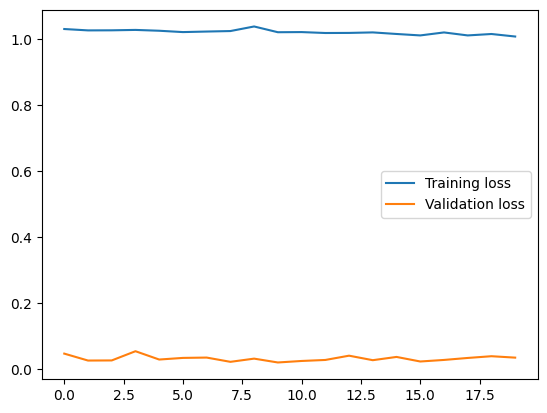

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

1/1 [==============================] - 0s 33ms/step
7


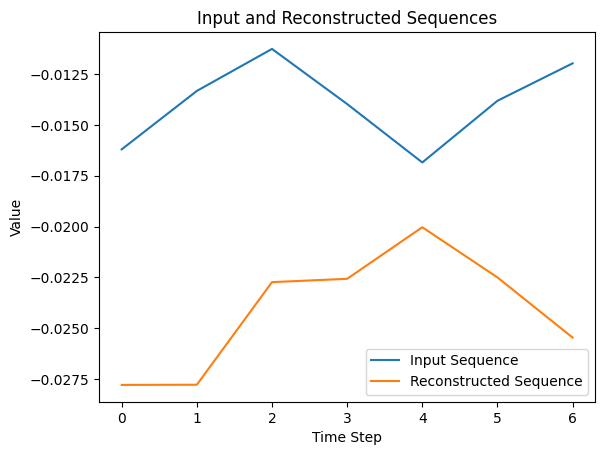

1/1 [==============================] - 0s 33ms/step
7


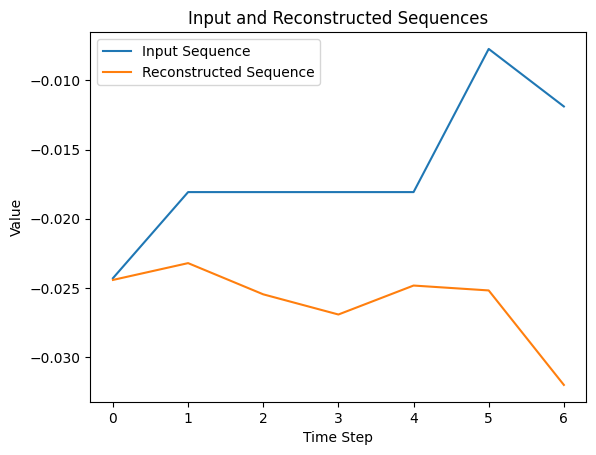

1/1 [==============================] - 0s 25ms/step
7


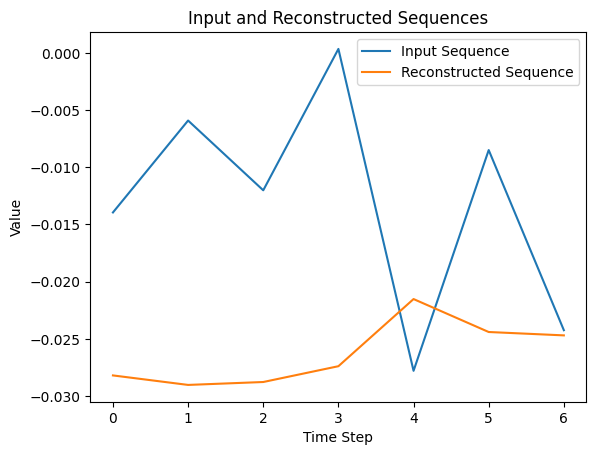

1/1 [==============================] - 0s 21ms/step
7


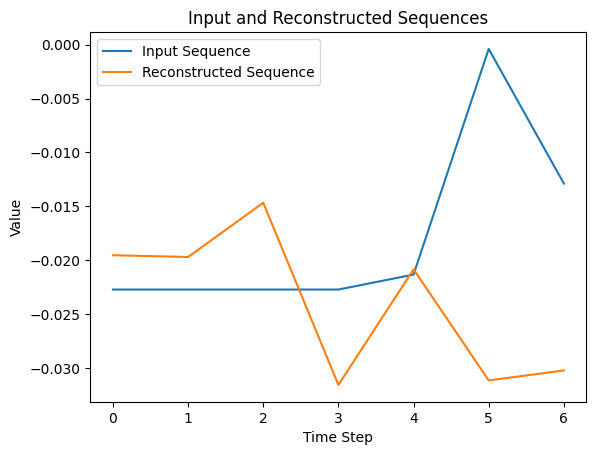

1/1 [==============================] - 0s 21ms/step
7


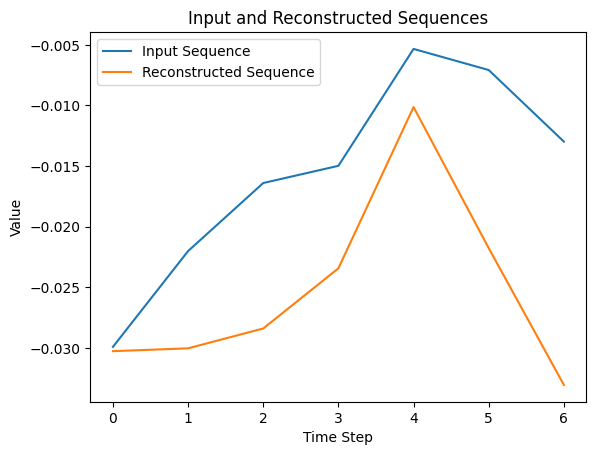

1/1 [==============================] - 0s 25ms/step
7


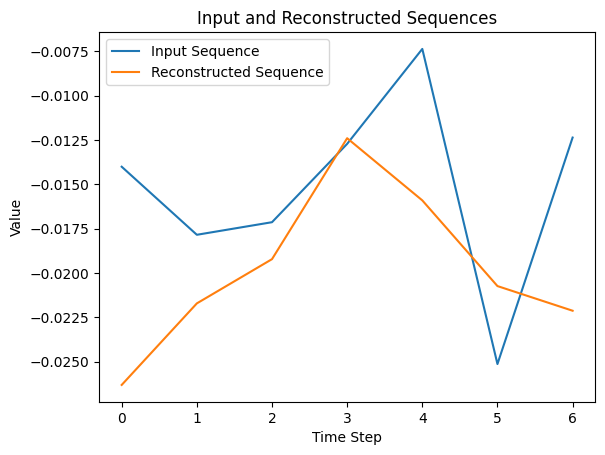

1/1 [==============================] - 0s 20ms/step
7


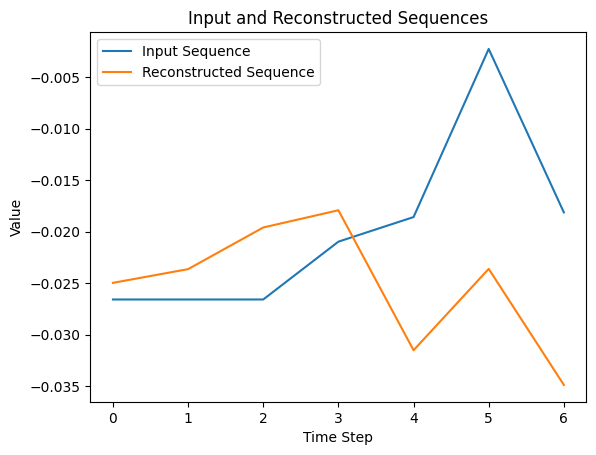

1/1 [==============================] - 0s 20ms/step
7


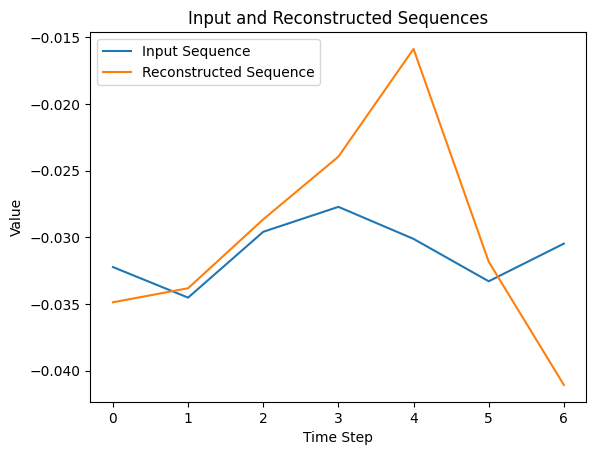

1/1 [==============================] - 0s 20ms/step
7


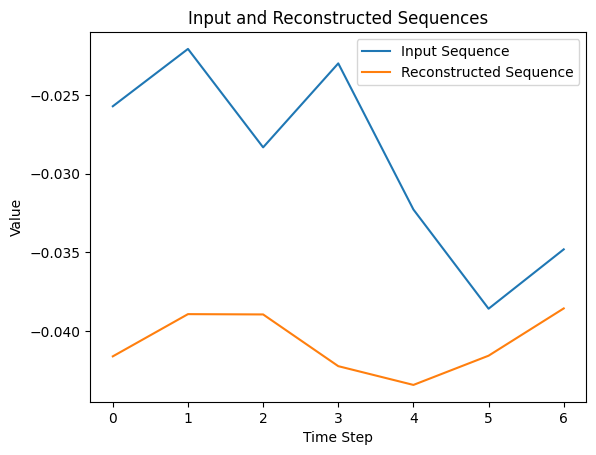

1/1 [==============================] - 0s 21ms/step
7


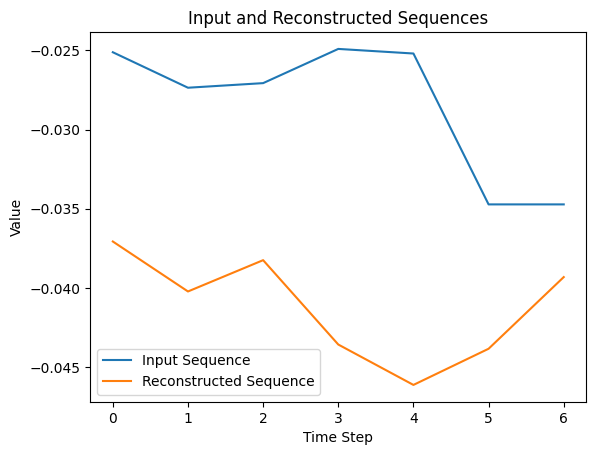

1/1 [==============================] - 0s 20ms/step
7


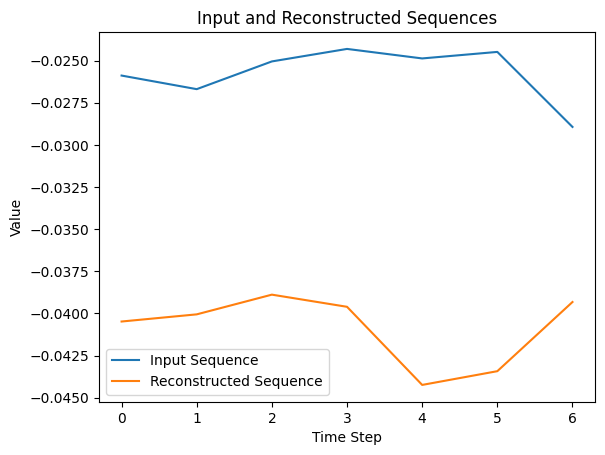

1/1 [==============================] - 0s 22ms/step
7


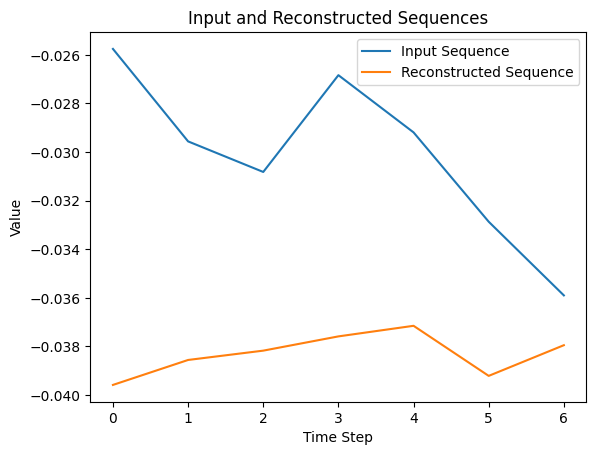

1/1 [==============================] - 0s 19ms/step
7


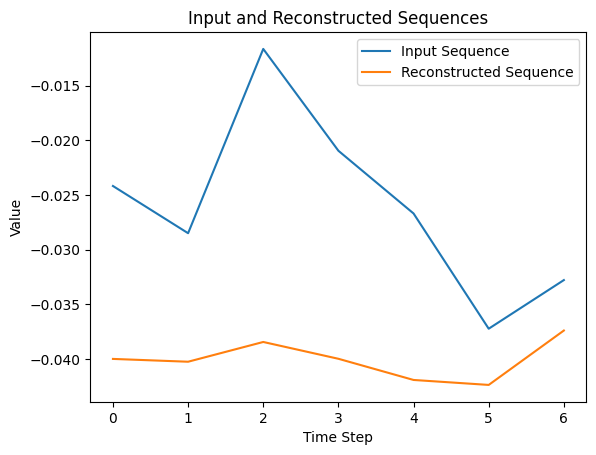

1/1 [==============================] - 0s 20ms/step
7


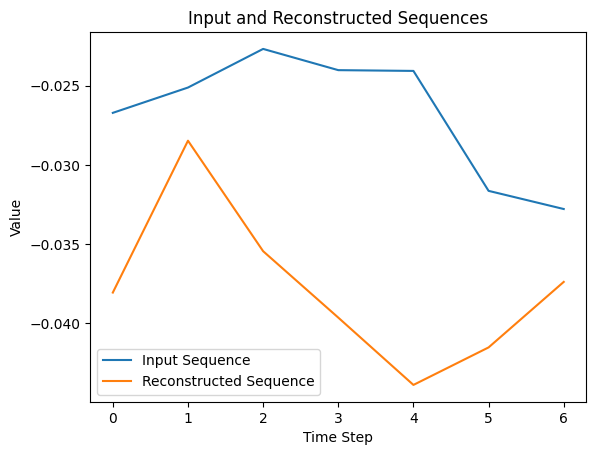

1/1 [==============================] - 0s 20ms/step
7


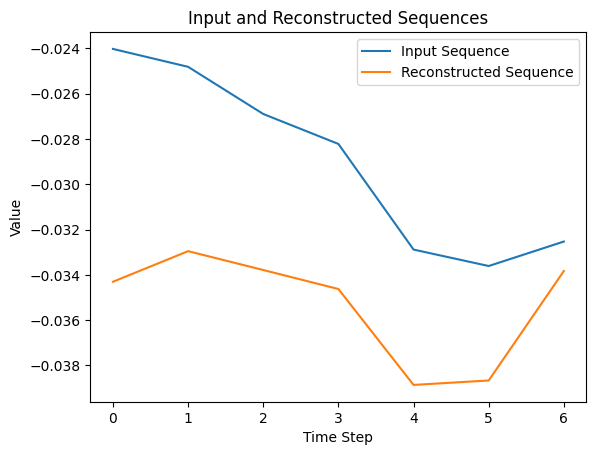

In [ ]:
# RECONSTRUCTIONS
for k in range(0, 100, seq_size):
  reconstructed = []
  sequence_reconstructed = seq_size
  for i in range(sequence_reconstructed):
    input_sequence = reshaped_tensor_X[i+k].reshape(1,seq_size,num_features)
    reconstructed_sequence = model.predict(input_sequence)
    reconstructed_sequence = np.squeeze(reconstructed_sequence, axis=0)
    input_sequence = np.squeeze(input_sequence, axis=0)[:, 3]
    reconstructed.append(reconstructed_sequence)

  print(len(reconstructed))
  # Plot both sequences on the same graph
  plt.plot(np.squeeze(reshaped_tensor_X[seq_size-1+k].reshape(1,seq_size,num_features), axis=0)[:, 3], label='Input Sequence')
  plt.plot(reconstructed, label='Reconstructed Sequence')
  plt.title('Input and Reconstructed Sequences')
  plt.xlabel('Time Step')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

In [ ]:
## MODEL V2
model = Sequential()
model.add(LSTM(256, input_shape=(None, num_features), batch_input_shape=(None, None, num_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))  # No return_sequences for the final LSTM layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

huber_loss = Huber(delta=1.0)
initial_learning_rate = 0.001
lr_schedule = CosineDecay(initial_learning_rate, decay_steps=20)
cosine_annealing_optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=cosine_annealing_optimizer, loss=huber_loss)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, None, 256)         270336    
                                                                 
 dropout_10 (Dropout)        (None, None, 256)         0         
                                                                 
 lstm_13 (LSTM)              (None, None, 128)         197120    
                                                                 
 dropout_11 (Dropout)        (None, None, 128)         0         
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [ ]:
history = model.fit(reshaped_tensor_X, reshaped_tensor_Y, epochs=20, batch_size=200, validation_split=0.1, verbose=1)

In [ ]:
# TRAINING V2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dropout, RepeatVector, TimeDistributed, Dense

def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.005)

epochs = 20
batch_size = 20000
mae_list = []

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    epoch_loss= 0
    mae_epoch = 0
    for i in range(0, len(reshaped_tensor_X), batch_size):
        x_batch = reshaped_tensor_X[i:i+batch_size]
        y_batch = reshaped_tensor_Y[i:i+batch_size]  # Considering the first feature for training

        with tf.GradientTape() as tape:
            predictions = model(x_batch)
            loss = custom_loss(y_batch, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        epoch_loss += loss

        mae_batch = np.mean(np.abs(y_batch - predictions.numpy()))
        mae_epoch += mae_batch
    # Store the training loss for this epoch

    mae_list.append(mae_epoch / (len(reshaped_tensor_X) / batch_size))
    print(f'Loss: {epoch_loss}, MAE: {mae_list[-1]}')

Epoch 1/20
Loss: 3.9127445220947266, MAE: 0.053857470414514295
Epoch 2/20
Loss: 3.853231906890869, MAE: 0.05303829389641814
Epoch 3/20


KeyboardInterrupt: ignored

In [ ]:
plt.plot(mae_list, label='MAE Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step
7


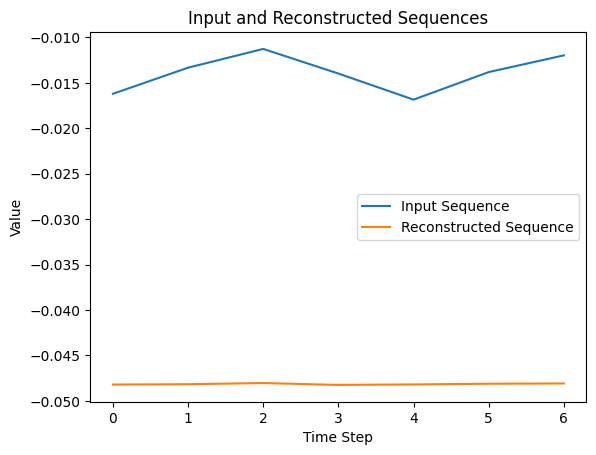

1/1 [==============================] - 0s 19ms/step
7


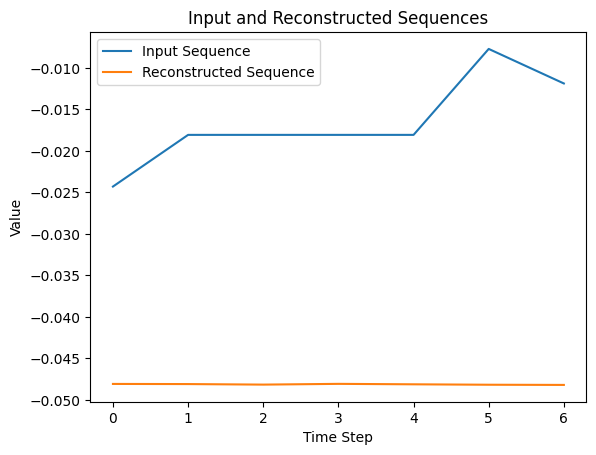

1/1 [==============================] - 0s 22ms/step
7


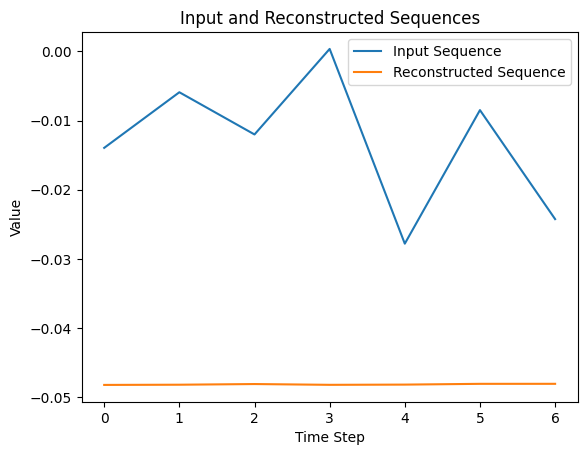

1/1 [==============================] - 0s 18ms/step
7


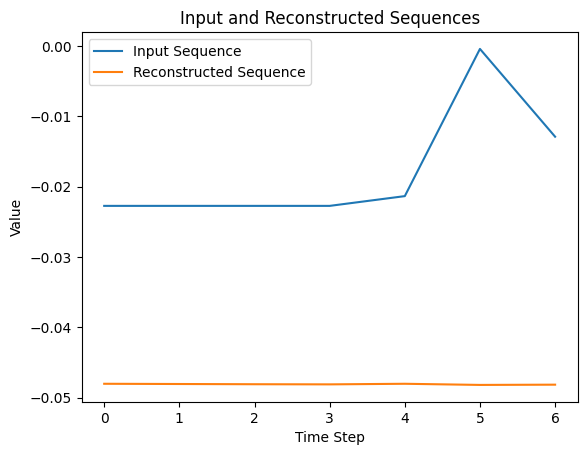

1/1 [==============================] - 0s 22ms/step
7


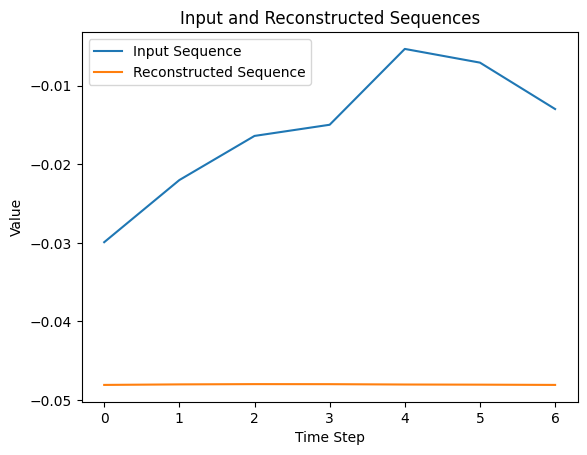

1/1 [==============================] - 0s 19ms/step
7


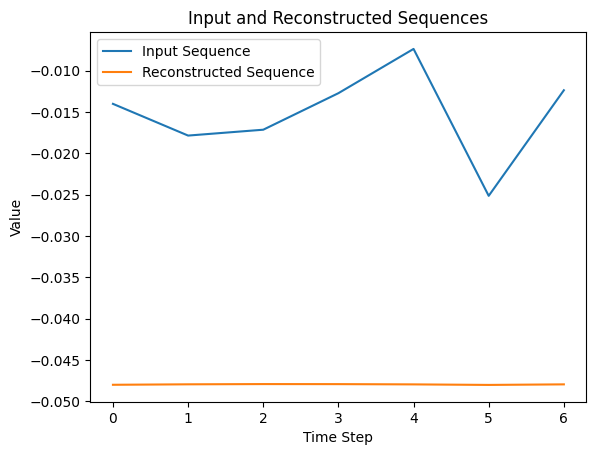

1/1 [==============================] - 0s 24ms/step
7


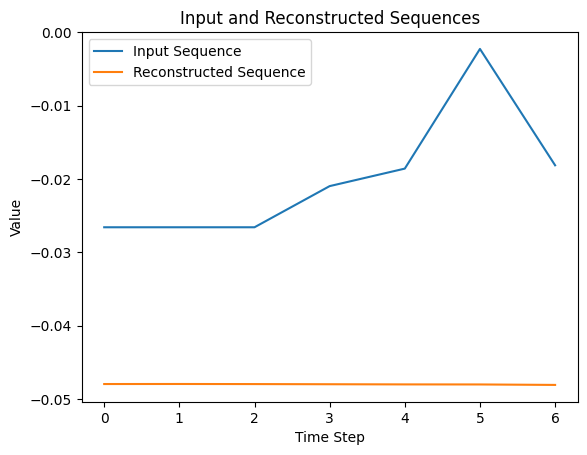

1/1 [==============================] - 0s 22ms/step
7


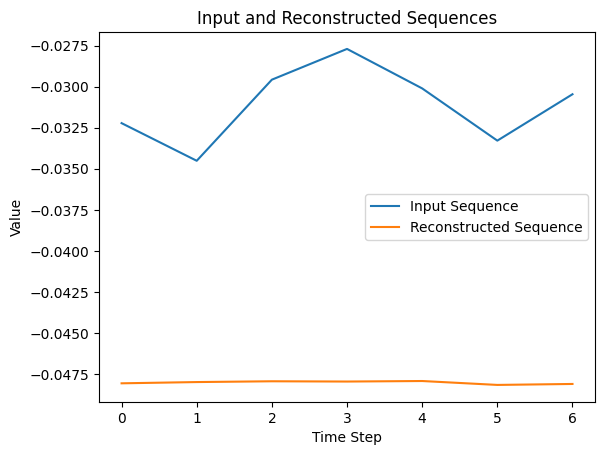

1/1 [==============================] - 0s 18ms/step
7


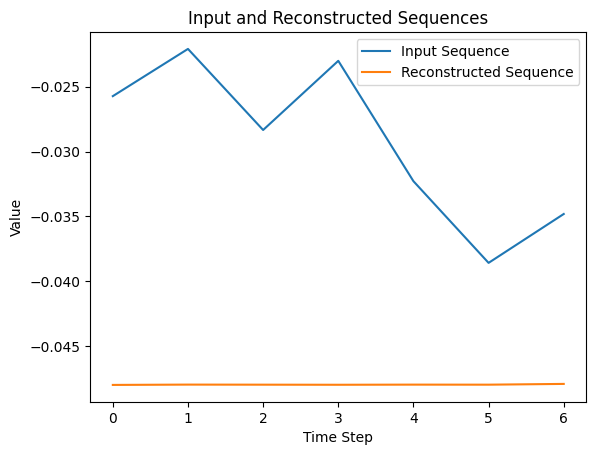

1/1 [==============================] - 0s 21ms/step
7


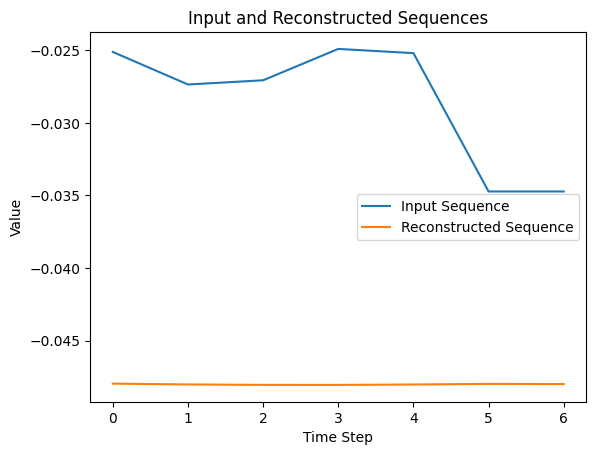

1/1 [==============================] - 0s 24ms/step
7


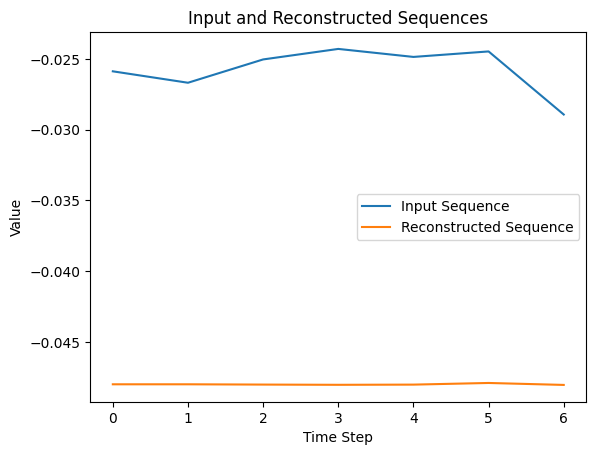

1/1 [==============================] - 0s 19ms/step
7


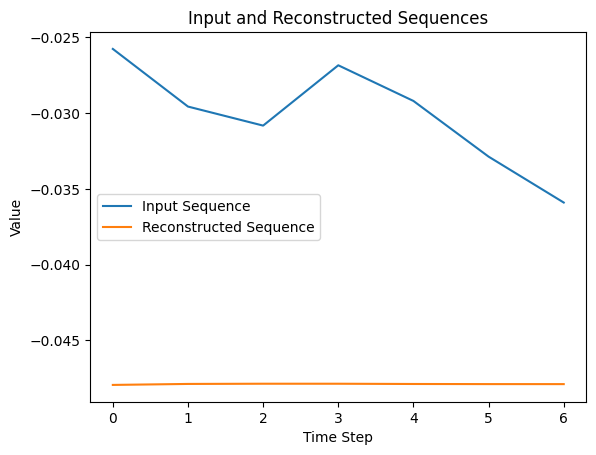

1/1 [==============================] - 0s 22ms/step
7


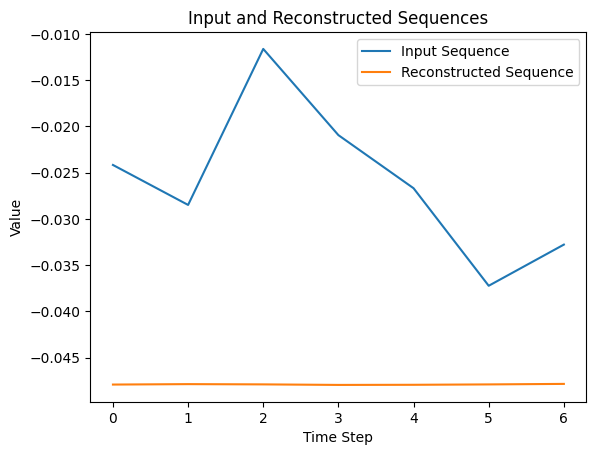

1/1 [==============================] - 0s 31ms/step
7


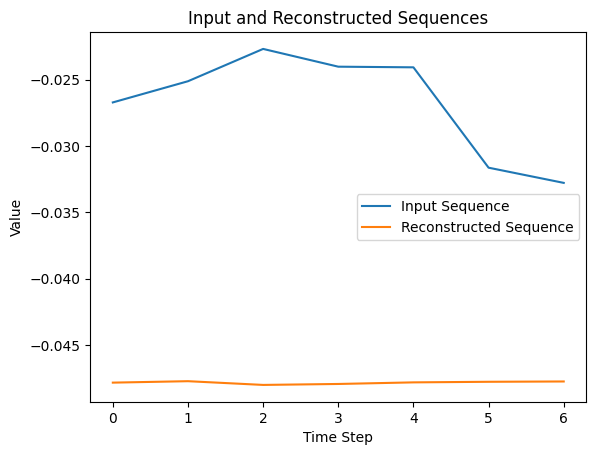

1/1 [==============================] - 0s 27ms/step
7


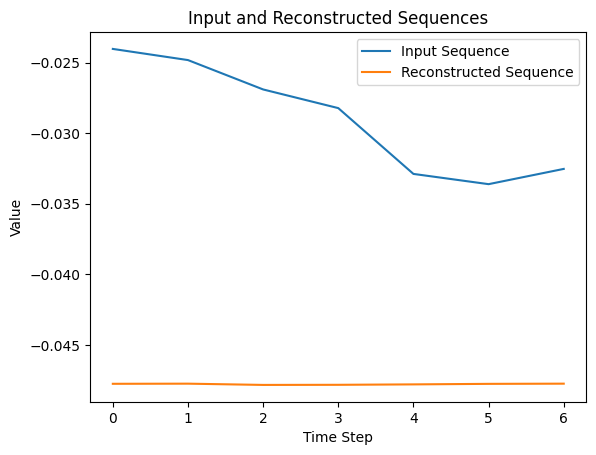

In [ ]:
## RECONSTRUCTIONS
for k in range(0, 100, seq_size):
  reconstructed = []
  sequence_reconstructed = seq_size
  for i in range(sequence_reconstructed):
    input_sequence = reshaped_tensor_X[i+k].reshape(1,seq_size,num_features)
    reconstructed_sequence = model.predict(input_sequence)
    reconstructed_sequence = np.squeeze(reconstructed_sequence, axis=0)
    input_sequence = np.squeeze(input_sequence, axis=0)[:, 3]
    reconstructed.append(reconstructed_sequence)

  print(len(reconstructed))
  # Plot both sequences on the same graph
  plt.plot(np.squeeze(reshaped_tensor_X[seq_size-1+k].reshape(1,seq_size,num_features), axis=0)[:, 3], label='Input Sequence')
  plt.plot(reconstructed, label='Reconstructed Sequence')
  plt.title('Input and Reconstructed Sequences')
  plt.xlabel('Time Step')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

# PyTorch Model

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pickle
from torch.nn import TransformerEncoder
from torch.nn import TransformerDecoder
from torch.optim import AdamW, SGD, RMSprop, Adagrad, Adam
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
import numpy as np
import torch
from matplotlib.backends.backend_pdf import PdfPages
import os
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
import math
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, StepLR, ExponentialLR, LinearLR, LambdaLR, ReduceLROnPlateau
torch.manual_seed(1)

In [17]:
bs, seq, dim = 2, 3, 4
model = torch.nn.TransformerEncoder(encoder_layer=torch.nn.TransformerEncoderLayer(d_model=dim, nhead=2), num_layers=6)
out = model(torch.randn(seq, bs, dim), mask=torch.nn.Transformer.generate_square_subsequent_mask(seq), is_causal=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


## Plotting functions

In [5]:
def plot_accuracies(accuracy_list, folder):
	os.makedirs(f'plots/{folder}/', exist_ok=True)
	trainAcc = [i[0] for i in accuracy_list]
	lrs = [i[1] for i in accuracy_list]
	plt.xlabel('Epochs')
	plt.ylabel('Average Training Loss')
	plt.plot(range(len(trainAcc)), trainAcc, label='Average Training Loss', linewidth=1, linestyle='-', marker='.')
	plt.twinx()
	plt.plot(range(len(lrs)), lrs, label='Learning Rate', color='r', linewidth=1, linestyle='--', marker='.')
	plt.savefig(f'plots/{folder}/training-graph.pdf')
	plt.clf()

In [7]:
def smooth(y, box_pts=1):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def plotter(name, y_true, y_pred, ascore):
	if 'TranAD' in name: y_true = torch.roll(y_true, 1, 0)
	os.makedirs(os.path.join('plots', name), exist_ok=True)
	pdf = PdfPages(f'plots/{name}/output.pdf')
	for dim in range(y_true.shape[1]):
		y_t = y_true[:, dim]
		y_p = y_pred[:, dim]
		a_s = ascore[:, dim]
		fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
		ax1.set_ylabel('Value')
		ax1.set_title(f'Dimension = {dim}')
		# if dim == 0: np.save(f'true{dim}.npy', y_t); np.save(f'pred{dim}.npy', y_p); np.save(f'ascore{dim}.npy', a_s)
		ax1.plot(smooth(y_t), linewidth=0.2, label='True')
		ax1.plot(smooth(y_p), '-', alpha=0.6, linewidth=0.3, label='Predicted')
		ax3 = ax1.twinx()
		if dim == 0: ax1.legend(ncol=2, bbox_to_anchor=(0.6, 1.02))
		ax2.plot(smooth(a_s), linewidth=0.2, color='g')
		ax2.set_xlabel('Timestamp')
		ax2.set_ylabel('Anomaly Score')
		pdf.savefig(fig)
		plt.close()
	pdf.close()

## Model Definition

### Helpers

In [8]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model).float() * (-math.log(10000.0) / d_model))
        pe += torch.sin(position * div_term)
        pe += torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x, pos=0):
        x = x + self.pe[pos:pos+x.size(0), :]
        return self.dropout(x)


In [9]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward=16, dropout=0):
        super(TransformerEncoderLayer, self).__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        self.linear1 = nn.Linear(d_model, dim_feedforward)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(dim_feedforward, d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

        self.activation = nn.LeakyReLU(True)

    def forward(self, src, src_mask=None, src_key_padding_mask=None, is_causal=False):
        src2 = self.self_attn(src, src, src)[0]
        src = src + self.dropout1(src2)
        src2 = self.linear2(self.dropout(self.activation(self.linear1(src))))
        src = src + self.dropout2(src2)
        return src


In [10]:
class TransformerDecoderLayer(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward=16, dropout=0):
        super(TransformerDecoderLayer, self).__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        self.multihead_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        self.linear1 = nn.Linear(d_model, dim_feedforward)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(dim_feedforward, d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.dropout3 = nn.Dropout(dropout)

        self.activation = nn.LeakyReLU(True)

    def forward(self, tgt, memory, tgt_mask=None, memory_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None, tgt_is_causal=False, memory_is_causal=False):
        tgt2 = self.self_attn(tgt, tgt, tgt)[0]
        tgt = tgt + self.dropout1(tgt2)
        tgt2 = self.multihead_attn(tgt, memory, memory)[0]
        tgt = tgt + self.dropout2(tgt2)
        tgt2 = self.linear2(self.dropout(self.activation(self.linear1(tgt))))
        tgt = tgt + self.dropout3(tgt2)
        return tgt

### Model (original: output feat = input feat)

In [12]:
class TranAD(nn.Module):
  def __init__(self, feats, out_feat):
    super(TranAD, self).__init__()
    self.name = 'TranAD'
    self.lr = 1e-3
    self.n_feats = feats
    self.n_out_feats = out_feat
    self.n_window = 10
    self.n = self.n_feats * self.n_window
    self.pos_encoder = PositionalEncoding(2 * feats, 0.1, self.n_window)

    encoder_layers = TransformerEncoderLayer(d_model=2 * feats, nhead=feats, dim_feedforward=18, dropout=0.1)
    self.transformer_encoder = TransformerEncoder(encoder_layers, 1)
    decoder_layers1 = TransformerDecoderLayer(d_model=2 * feats, nhead=feats, dim_feedforward=18, dropout=0.1)
    self.transformer_decoder1 = TransformerDecoder(decoder_layers1, 1)

    decoder_layers2 = TransformerDecoderLayer(d_model=2 * feats, nhead=feats, dim_feedforward=18, dropout=0.1)
    self.transformer_decoder2 = TransformerDecoder(decoder_layers2, 1)

    self.fcn = nn.Sequential(nn.Linear(2 * feats, feats))

  def encode(self, src, c, tgt):
    src = torch.cat((src, c), dim=2)
    src = src * math.sqrt(self.n_feats)
    src = self.pos_encoder(src)
    memory = self.transformer_encoder(src)
    tgt = tgt.repeat(1, 1, 2)
    return tgt, memory

  def forward(self, src, tgt):
      c = torch.zeros_like(src)
      x_enc, x_ = self.encode(src, c, tgt)
      x_dec = self.transformer_decoder1(x_enc, x_)

      x1 = self.fcn(x_dec)

      # Phase 2 - With anomaly scores
      c = (x1 - src) ** 2
      x2_enc, x2_ = self.encode(src, c, tgt)
      x2_dec = self.transformer_decoder2(x2_enc, x2_)
      x2 = self.fcn(x2_dec)
      return x1, x2


## Input Preparation

In [13]:
num_epochs = 500
num_window = 30
device = torch.device("cuda" if torch.cuda.is_available() else "mps")

In [18]:
def convert_to_windows(data):
	windows = []; w_size = 10
	for i, g in enumerate(data):
		if i >= w_size: w = data[i-w_size:i]
		else: w = torch.cat([data[0].repeat(w_size-i, 1), data[0:i]])
		windows.append(w)
	return torch.stack(windows)

In [19]:
# Prepare data
tensor_v2 = np.load('/Users/nicolasvila/workplace/uni/ABDataChallenge/tensor_data_final_v2.npy', allow_pickle =True)

In [20]:
tensor_v2[0][0]
# 0, 1, 2, 3, 4, 5, 8, 14, 15, 16,

array([0, 2019, 1, 1, 0, 0, 1032.0, 0.0, '2019-01-01', 12.0, 9.0, 1.59,
       1.2, 2.59, 1, 1, 1, 18.5, 110.20556, 105.687035, 105820, 41134,
       2.5725677, 11552, 28329, 16794, 13650, 14085, 34540, 12.51, 66.1,
       21.39, 43.68, 25.72, 19.57, 7.88, 10.38, 83.57, 1.08, 9.19, 90.88,
       58.5, 91.21, 4.27, 102.76, 66.65], dtype=object)

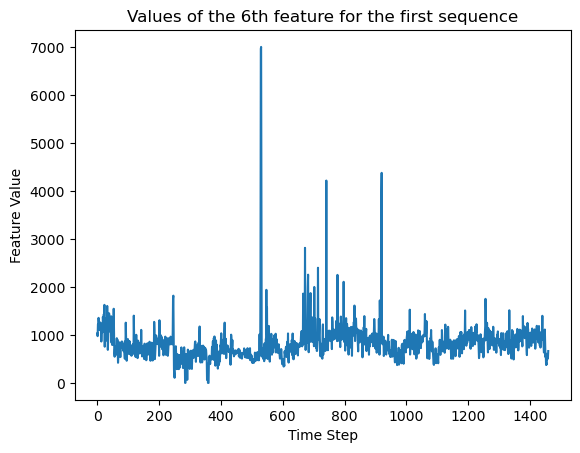

In [76]:
values_to_plot = tensor_v2[0,:,6]
# Create a plot
plt.plot(values_to_plot)  # Assuming PyTorch tensor, convert to NumPy for plotting

# Add labels and title
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.title('Values of the 6th feature for the first sequence')

# Show the plot
plt.show()

In [21]:
delete_tables = [16, 15, 14, 8, 7, 5, 4, 3, 2, 1, 0]
delete_tables = [8]
for col in delete_tables:
    tensor_v2 = np.delete(tensor_v2, col, axis=-1)

tensor_v2 = tensor_v2.astype(float)

In [22]:
tensor_v2[0][0]

array([0.00000000e+00, 2.01900000e+03, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.03200000e+03, 0.00000000e+00,
       1.20000000e+01, 9.00000000e+00, 1.59000000e+00, 1.20000000e+00,
       2.59000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.85000000e+01, 1.10205560e+02, 1.05687035e+02, 1.05820000e+05,
       4.11340000e+04, 2.57256770e+00, 1.15520000e+04, 2.83290000e+04,
       1.67940000e+04, 1.36500000e+04, 1.40850000e+04, 3.45400000e+04,
       1.25100000e+01, 6.61000000e+01, 2.13900000e+01, 4.36800000e+01,
       2.57200000e+01, 1.95700000e+01, 7.88000000e+00, 1.03800000e+01,
       8.35700000e+01, 1.08000000e+00, 9.19000000e+00, 9.08800000e+01,
       5.85000000e+01, 9.12100000e+01, 4.27000000e+00, 1.02760000e+02,
       6.66500000e+01])

In [23]:

scaler = StandardScaler()
num_features = len(tensor_v2[0][0])

for col in list(range(num_features)):
        if col != 6:
                reshaped_feature = tensor_v2[:, :, col].reshape(-1, 1)

                # Fit and transform with the scaler
                normalized_feature = scaler.fit_transform(reshaped_feature)

                # Reshape the normalized feature and update the original tensor
                tensor_v2[:, :, col] = normalized_feature.reshape(tensor_v2.shape[:2])


In [24]:
tensor_single = tensor_v2[0][:, 0][:, np.newaxis]
print(tensor_single.shape)

tensor_full = tensor_v2[0]
tensor_full.shape

(1460, 1)


(1460, 45)

In [73]:
#tensor_v2_stacked = tensor_v2.reshape(tensor_v2.shape[0]*tensor_v2.shape[1], tensor_v2.shape[2])
num_features = tensor_full.shape[1]
num_out_feats = 1
feat_index = 0
print(tensor_full.shape[0])
train_loader = DataLoader(tensor_full, batch_size=tensor_full.shape[0])
trainD = next(iter(train_loader))
trainO = trainD
print(trainD.shape)
trainD = convert_to_windows(trainD)

1460
torch.Size([1460, 45])


In [26]:
trainD.shape

torch.Size([1460, 10, 45])

In [27]:
data_x = trainD.float(); dataset = TensorDataset(data_x, data_x)
bs = 1460
dataloader = DataLoader(dataset, batch_size = bs)

## Model Training

In [70]:
model = TranAD(feats=num_features, out_feat = 1)
# optimizer = torch.optim.AdamW(model.parameters() , lr=model.lr, weight_decay=1e-5)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 5, 0.9)

optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-6)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min = 0)

/Users/nicolasvila/miniconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [72]:
# Training loop
feature_index = 6
model.to(device)
accuracy_list = []
for epoch in range(num_epochs):
  l1s, l2s = [], []
  n = epoch + 1; w_size = num_window
  l = nn.HuberLoss(reduction = 'none')
  for d, _  in dataloader:
          d = d.to(device)
          print(d.shape)
          local_bs = d.shape[0]
          print(local_bs)
          window = d.permute(1, 0, 2)
          elem = window[-1, :, :].view(1, local_bs, num_features) #[:, :, 0].unsqueeze(2)
          elem_feature = elem[:, :, feature_index].unsqueeze(2) # Change 0 to the index of the feature
          z = model(window, elem_feature)
          # Select the feature from elem for which you want to compute the loss
          l1 = l(z, elem_feature) if not isinstance(z, tuple) else (1 / n) * l(z[0], elem_feature) + (1 - 1/n) * l(z[1], elem_feature)
          if isinstance(z, tuple): z = z[1]
          l1s.append(torch.mean(l1).item())
          loss = torch.mean(l1)
          optimizer.zero_grad()
          loss.backward(retain_graph=True)
          optimizer.step()
  scheduler.step()
  print(f'Epoch {epoch},\tL1 = {np.mean(l1s)}')
  lossT, lr = np.mean(l1s), optimizer.param_groups[0]['lr']
  accuracy_list.append((lossT, lr))

torch.Size([1460, 10, 45])
1460
Epoch 0,	L1 = 1038.64990234375
torch.Size([1460, 10, 45])
1460
Epoch 1,	L1 = 1016.7327270507812
torch.Size([1460, 10, 45])
1460
Epoch 2,	L1 = 988.0686645507812
torch.Size([1460, 10, 45])
1460
Epoch 3,	L1 = 974.11279296875
torch.Size([1460, 10, 45])
1460
Epoch 4,	L1 = 947.10107421875
torch.Size([1460, 10, 45])
1460
Epoch 5,	L1 = 941.2156372070312
torch.Size([1460, 10, 45])
1460
Epoch 6,	L1 = 911.3533935546875
torch.Size([1460, 10, 45])
1460
Epoch 7,	L1 = 898.416015625
torch.Size([1460, 10, 45])
1460
Epoch 8,	L1 = 899.7269897460938
torch.Size([1460, 10, 45])
1460
Epoch 9,	L1 = 877.8709716796875
torch.Size([1460, 10, 45])
1460
Epoch 10,	L1 = 860.8485107421875
torch.Size([1460, 10, 45])
1460
Epoch 11,	L1 = 844.7732543945312
torch.Size([1460, 10, 45])
1460
Epoch 12,	L1 = 839.2461547851562
torch.Size([1460, 10, 45])
1460
Epoch 13,	L1 = 839.2879638671875
torch.Size([1460, 10, 45])
1460
Epoch 14,	L1 = 830.4205932617188
torch.Size([1460, 10, 45])
1460
Epoch 15,	L

KeyboardInterrupt: 

In [31]:
plot_accuracies(accuracy_list, f'TransAD')

<Figure size 640x480 with 0 Axes>

## Tuning hyperparameters

In [126]:
def train(model, device, num_epochs, num_window, scheduler, optimizer, dataloader, print_loss=False):
    model.to(device)
    accuracy_list = []
    for epoch in range(num_epochs):
        l1s, l2s = [], []
        n = epoch + 1; w_size = num_window
        l = nn.HuberLoss(reduction = 'none')
        for d, _  in dataloader:
                d = d.to(device)
                local_bs = d.shape[0]
                window = d.permute(1, 0, 2)
                elem = window[-1, :, :].view(1, local_bs, num_features) #[:, :, 0].unsqueeze(2)
                elem_feature = elem[:, :, 3].unsqueeze(2) # Change 0 to the index of the feature
                z = model(window, elem_feature)
                # Select the feature from elem for which you want to compute the loss

                l1 = l(z, elem_feature) if not isinstance(z, tuple) else (1 / n) * l(z[0], elem_feature) + (1 - 1/n) * l(z[1], elem_feature)
                if isinstance(z, tuple): z = z[1]
                l1s.append(torch.mean(l1).item())
                loss = torch.mean(l1)
                optimizer.zero_grad()
                loss.backward(retain_graph=True)
                optimizer.step()
        scheduler.step()
        if print_loss: print(f'Epoch {epoch},\tL1 = {np.mean(l1s)}')
        lossT, lr = np.mean(l1s), optimizer.param_groups[0]['lr']
        accuracy_list.append((lossT, lr))
    return accuracy_list


In [127]:
from sklearn.model_selection import ParameterGrid
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

# Define the hyperparameters to tune
param_grid = {'lr': [1e-3, 1e-4, 1e-5, 1e-6],
              'weight_decay': [0, 1e-8, 1e-7, 1e-6, 1e-5],
              'T_0': [5, 10, 15, 20, 25],
              'T_mult': [1, 2, 3, 4],
              'num_window': [5, 10, 20, 30, 40], 
              'scheduler': [CosineAnnealingWarmRestarts, StepLR, ExponentialLR, LinearLR, ReduceLROnPlateau],
              'optimizer': [AdamW, SGD, RMSprop, Adagrad, Adam],
              'step_size': [5, 10, 30, 50]
              }

# Create a parameter grid
total_combinations = 1
for param_values in param_grid.values():
    total_combinations *= len(param_values)
print(f"Total number of combinations: {total_combinations}")


Total number of combinations: 200000


In [130]:
from joblib import Parallel, delayed
from sklearn.model_selection import GridSearchCV
from torch.optim import AdamW, SGD, RMSprop, Adagrad, Adam
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, TransformerMixin
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, StepLR, ExponentialLR, LinearLR, LambdaLR, ReduceLROnPlateau
import multiprocessing as mp
from itertools import product

In [140]:
param_grid_list = list(product(ParameterGrid(param_grid), [dataloader], [num_epochs]))


In [141]:
# Define a new function that includes both the training and the parameter setting
def train_with_params(param_grid_list):
    params = param_grid_list[0]
    dataloader = param_grid_list[1]
    num_epochs = param_grid_list[2]
    model = TranAD(feats=num_features, out_feat = 1)
    print(f"Computing for parameters: {params}")

    if params['optimizer'] == AdamW:
        optimizer = params['optimizer']
        optimizer = optimizer(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
    if params['optimizer'] == SGD:
        optimizer = params['optimizer']
        optimizer = optimizer(model.parameters(), lr=params['lr'], momentum=0.9)
    if params['optimizer'] == RMSprop:
        optimizer = params['optimizer']
        optimizer = optimizer(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'], momentum=0.9)
    if params['optimizer'] == Adagrad:
        optimizer = params['optimizer']
        optimizer = optimizer(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
    if params['optimizer'] == Adam:
        optimizer = params['optimizer']
        optimizer = optimizer(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])


    if params['scheduler'] == CosineAnnealingWarmRestarts:
        scheduler = params['scheduler']
        scheduler = scheduler(optimizer, T_0=params['T_0'], T_mult=params['T_mult'], eta_min=0)
    if params['scheduler'] == StepLR:
        scheduler = params['scheduler']
        scheduler = scheduler(optimizer, params['step_size'], 0.9)
    if params['scheduler'] == ExponentialLR:
        scheduler = params['scheduler']
        scheduler = scheduler(optimizer, gamma=0.9)
    if params['scheduler'] == LinearLR:
        scheduler = params['scheduler']
        scheduler = scheduler(optimizer)
    if params['scheduler'] == ReduceLROnPlateau:
        scheduler = params['scheduler']
        scheduler = scheduler(optimizer)

    return train(model, device, num_epochs, params['num_window'], scheduler, optimizer, dataloader, print_loss=False)

# Create a pool of workers
num_epochs = 1
with mp.Pool(processes=mp.cpu_count()) as pool:
    results = pool.map(train_with_params, param_grid_list)


Process SpawnPoolWorker-51:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'train_with_params' on <module '__main__' (built-in)>
Process SpawnPoolWorker-50:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.frame

KeyboardInterrupt: 

## Testing

In [32]:
tensor_single_test = tensor_v2[66]
train_loader = DataLoader(tensor_single_test, batch_size=tensor_single_test.shape[0])
trainD = next(iter(train_loader))
trainO = trainD
trainD = convert_to_windows(trainD)
data_x = trainD.float(); dataset = TensorDataset(data_x, data_x)
bs = 1460
test_loader = DataLoader(dataset, batch_size = bs)

In [33]:
torch.zero_grad = True
model.eval()
for d, _ in test_loader:
  d = d.to(device)
  window = d.permute(1, 0, 2)
  elem = window[-1, :, :].view(1, bs, num_features)

  # Select the feature from elem for which you want to compute the loss
  #if num_out_feats==1 and num_features != 1:
  elem_feature = elem[:, :, 0].unsqueeze(2) # Change 0 to the index of the feature

  z = model(window, elem_feature)
  if isinstance(z, tuple): z = z[1]
  loss = l(z, elem_feature)[0]

loss, y_pred = loss.detach().cpu().numpy(), z.detach().cpu().numpy()[0]
testO = torch.roll(trainO, 1, 0)
y_true = testO[:, feature_index].unsqueeze(1)
plotter(f'TransAD', y_true, y_pred, loss)
print(loss.shape)

(1460, 1)


In [66]:
from pyextremes import get_extremes
from pyextremes.plotting import plot_extremes

data = pd.Series(loss.squeeze(1))
data.head()

0    0.554275
1    0.554275
2    4.141473
3    7.523111
4    6.980670
dtype: float32

In [68]:
extremes = get_extremes(data, "POT", threshold=0.5, r="12H")
plot_extremes(
    ts=data,
    extremes=extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=0.5,
    r="12H",
)

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'Timedelta'

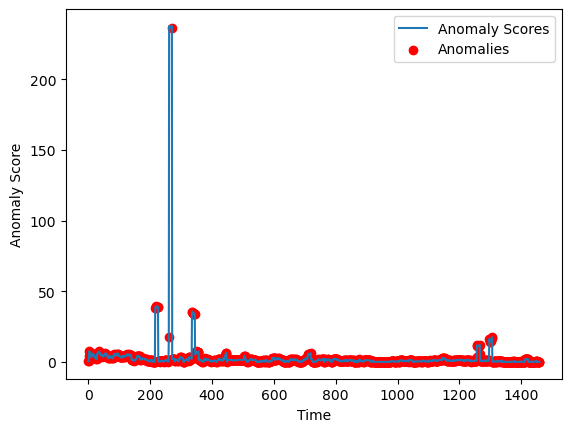

# Checking dataset dimensions

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
!git clone https://github.com/imperial-qore/TranAD.git

In [ ]:
a_1 = np.load('/content/A-1.npy')

In [ ]:
dataset = 'SMAP'
dataset_folder = '/content/TranAD/data/SMAP_MSL'
folder = '/content/TranAD/data/SMAP'
os.makedirs(folder, exist_ok=True)

In [ ]:
def normalize3(a, min_a = None, max_a = None):
	if min_a is None: min_a, max_a = np.min(a, axis = 0), np.max(a, axis = 0)
	return (a - min_a) / (max_a - min_a + 0.0001), min_a, max_a

In [ ]:
values = pd.read_csv('/content/TranAD/data/SMAP_MSL/labeled_anomalies.csv')
values = values[values['spacecraft'] == dataset]
filenames = values['chan_id'].values.tolist()
for fn in filenames:
  train = np.load(f'{dataset_folder}/train/{fn}.npy')
  test = np.load(f'{dataset_folder}/test/{fn}.npy')
  train, min_a, max_a = normalize3(train)
  test, _, _ = normalize3(test, min_a, max_a)
  np.save(f'{folder}/{fn}_train.npy', train)
  np.save(f'{folder}/{fn}_test.npy', test)
  labels = np.zeros(test.shape)
  indices = values[values['chan_id'] == fn]['anomaly_sequences'].values[0]
  indices = indices.replace(']', '').replace('[', '').split(', ')
  indices = [int(i) for i in indices]
  for i in range(0, len(indices), 2):
    labels[indices[i]:indices[i+1], :] = 1
  np.save(f'{folder}/{fn}_labels.npy', labels)

In [ ]:
def load_dataset(dataset):
  folder = '/content/TranAD/data/SMAP'
  if not os.path.exists(folder):
    raise Exception('Processed Data not found.')
  loader = []
  for file in ['train', 'test', 'labels']:
    if dataset == 'SMAP': file = 'P-1_' + file
    loader.append(np.load(os.path.join(folder, f'{file}.npy')))

  train_loader = DataLoader(loader[0], batch_size=loader[0].shape[0])
  test_loader = DataLoader(loader[1], batch_size=loader[1].shape[0])
  labels = loader[2]
  print(type(loader[0]))
  return train_loader, test_loader, labels

In [ ]:
train_loader, test_loader, labels = load_dataset(dataset)

<class 'numpy.ndarray'>


In [ ]:
trainD = next(iter(train_loader))
trainO = trainD

In [ ]:
def normalize3(a, min_a = None, max_a = None):
	if min_a is None: min_a, max_a = np.min(a, axis = 0), np.max(a, axis = 0)
	return (a - min_a) / (max_a - min_a + 0.0001), min_a, max_a